In [1]:
import itertools

import numpy as np
from qutip import *
# some_file.py
# import sys
from qudit import *
# import scipy
import time
import IPython.display as disp
# from tqdm.notebook import tqdm
# import multiprocess as mp
# import matplotlib.pyplot as plt
from continuous import *


# sys.path.insert(1, 'C:\\Users\\shoha\\Documents\\GitHub\\grimsmo-paper-simulations')

# from measurements import *

%load_ext autoreload
%autoreload 2

In [82]:
N=128
alpha = 4
four_cat0 = sum([( (1) ** i) * coherent(N, alpha*np.e ** (1j*i*np.pi/2)) for i in range(4)]).unit()
four_cat1 = sum([( (-1) ** i) * coherent(N, alpha*np.e ** (1j*i*np.pi/2)) for i in range(4)]).unit()
eight_cat0 = sum([( (1) ** i) * coherent(N, alpha*np.e ** (1j*i*np.pi/4)) for i in range(8)]).unit()
eight_cat1 = sum([( (-1) ** i) * coherent(N, alpha*np.e ** (1j*i*np.pi/4)) for i in range(8)]).unit()
ent_four_cat = ket2dm(tensor(four_cat0,four_cat0) + tensor(four_cat1,four_cat1)).unit()

(<Figure size 800x600 with 1 Axes>,
 <Axes: xlabel='Fock number', ylabel='Occupation probability'>)

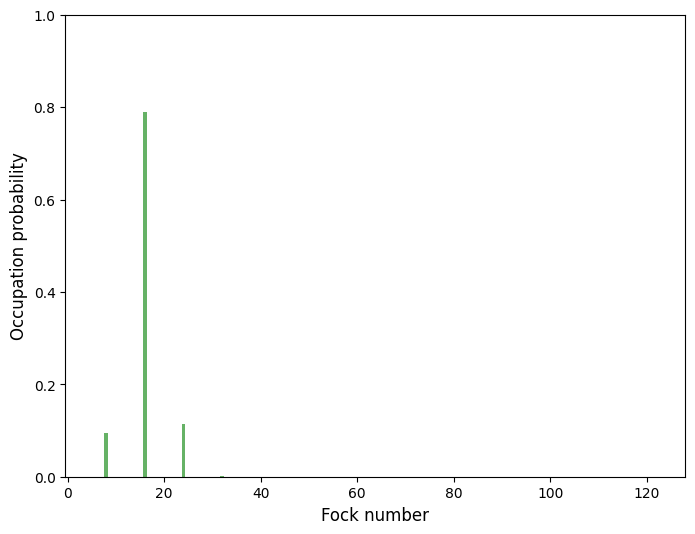

In [84]:
plot_fock_distribution(eight_cat0)
# plot_fock_distribution((destroy(N)**4 * four_cat1).unit())

In [109]:
p_state = ket2dm(basis(2,0)-basis(2,1)).unit()

q = ket2dm(eight_cat0 - eight_cat1).unit()
q.dims = [[2,2,2,2,2,2,2],[2,2,2,2,2,2,2]]
qubit = q.ptrace([4])
print(f"{alpha=}")
print(qubit)
# print(fidelity(p_state,qubit))

alpha=4
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.49999988 -0.43171353]
 [-0.43171353  0.49999988]]


In [80]:
np.trace(qubit**2)

(0.9687111070611067+0j)

(0.0, 32.0)

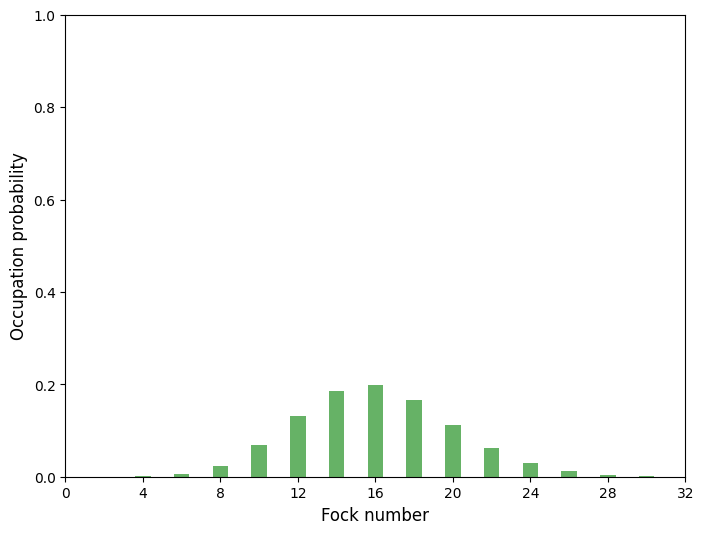

In [52]:
fig,ax = plot_fock_distribution(q)
ax.set_xticks(range(0,127,4))
ax.set_xlim([0,32])

In [67]:
p_state = ket2dm(basis(2,0)-basis(2,1)).unit()
fidelity(p_state,q.ptrace([5]))

0.9980370648665107

In [57]:
np.trace(q**2)

(0.9999998439567962+0j)

In [32]:
four_cat1.dims = [[2,2,2,2,2],[2,2,2,2,2]]
four_cat1.ptrace([3]).full()

array([[0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

In [31]:
four_cat0.dims = [[2,2,2,2,2],[2,2,2,2,2]]
four_cat0.ptrace([4]).full()

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

In [17]:
a = 4
N = 32
d = 8
base_state_list = [sum([basis(N, d*i+j) for i in range(int(N/d))]).unit() for j in range(d)]
entQudit = EntangledBosonicQudit(N,d, base_state_list=base_state_list, res=16)
time1 = time.time()
# sigma_dit = entQudit.cavity_to_entangled_qudits(ket2dm(tensor(coherent(N,a)+coherent(N,-a), coherent(N,a)+coherent(N,-a) )))
# state = coherent(N,a) + coherent(N, 1j * a) + coherent(N, -a) + coherent(N, -1j * a)
state = coherent(N,a)+coherent(N,-a)
tensored_state = tensor(coherent(N,a), coherent(N,a)) + tensor(coherent(N,-a), coherent(N,-a))
sigma_dit = entQudit.cavity_to_entangled_qudits_cpu(ket2dm(tensored_state))
time2 = time.time()
print(time2-time1)
sigma_dit

0 0 0 0
list 0.14137840270996094
0 0 0 1
list 0.13417649269104004
0 0 0 2
list 0.13591742515563965
0 0 0 3
list 0.11509084701538086
0 0 0 4
list 0.12978839874267578
0 0 0 5
list 0.10935449600219727
0 0 0 6
list 0.1306006908416748
0 0 0 7
list 0.14497923851013184
0 0 1 0
list 0.13847613334655762
0 0 1 1
list 0.13825154304504395
0 0 1 2
list 0.12737369537353516
0 0 1 3
list 0.141984224319458
0 0 1 4
list 0.10935354232788086
0 0 1 5
list 0.10935425758361816
0 0 1 6
list 0.12497615814208984
0 0 1 7
list 0.13725757598876953
0 0 2 0
list 0.12536215782165527
0 0 2 1
list 0.11197781562805176
0 0 2 2
list 0.12497615814208984
0 0 2 3
list 0.1282660961151123
0 0 2 4
list 0.10935449600219727
0 0 2 5
list 0.15281915664672852
0 0 2 6
list 0.12562203407287598
0 0 2 7
list 0.14149951934814453
0 0 3 0
list 0.13031339645385742
0 0 3 1
list 0.10935425758361816
0 0 3 2
list 0.12497568130493164
0 0 3 3
list 0.13202166557312012
0 0 3 4
list 0.10935425758361816
0 0 3 5
list 0.10935425758361816
0 0 3 6
list 0

Quantum object: dims = [[64], [64]], shape = (64, 64), type = oper, isherm = True
Qobj data =
[[0.0315636  0.         0.03103429 ... 0.031578   0.         0.03192657]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.03103429 0.         0.03073948 ... 0.03117508 0.         0.03133283]
 ...
 [0.031578   0.         0.03117508 ... 0.0323578  0.         0.03240459]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.03192657 0.         0.03133283 ... 0.03240459 0.         0.03276099]]

In [8]:
np.array(sigma_dit)

NameError: name 'sigma_dit' is not defined

In [10]:
entQudit.basis_dict

{(0,
  -0.7853981633974483): Quantum object: dims=[[30], [1]], shape=(30, 1), type='ket'
 Qobj data =
 [[ 0.37796447]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [-0.37796447]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.37796447]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [-0.37796447]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.37796447]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [-0.37796447]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.37796447]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]],
 (0,
  -0.6806784082777885): Quantum object: dims=[[30], [1]], shape=(30, 1), type='ket'
 Qobj data =
 [[ 0.37796447+0.j        ]
  [ 0.        +0.j        ]
  [ 0.        +0.j        ]
  [ 0.        +0.j        ]
  [-0.34528773-0.153732j  ]
  [ 0.        +0.j        ]
  [ 0.        +0.j        ]
  [ 0.        +0.j        ]
  [ 0.2529076 +0.28088234j]
  [ 0.        +0.j        ]
  [ 0.        +0.j        ]
  [ 0.

In [ ]:
phi_p = (tensor(basis(2,0),basis(2,0)) + tensor(basis(2,1),basis(2,1))).unit()


Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]]